In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM 
from statsmodels.tsa.vector_ar.vecm import JohansenTestResult
from statsmodels.tsa.vector_ar.vecm import select_order
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
# Load data
data = pd.read_csv('term_structure.csv')
cols_of_interest = ['I5Y', 'I3Y', 'I180D', 'I90D']
df = data[cols_of_interest].dropna()
df

,I5Y,I3Y,I180D,I90D
0,7.83,7.04,5.50,5.64
1,7.05,6.22,5.66,5.73
2,8.41,7.86,5.99,5.94
3,8.32,7.91,5.88,5.86
4,8.29,7.89,5.92,5.88
...,...,...,...,...
213,5.34,5.05,4.78,4.55
214,5.53,5.27,4.91,4.80
215,5.20,4.94,5.00,4.89
216,4.97,4.71,5.00,4.84


### Question a)

In [5]:
model = VAR(df)
results_aic_bic = []
for p in range(1, 10):  # loops from 1 to 16 lags
    result = model.fit(p)
    results_aic_bic.append((p, result.aic, result.bic))
    
# Convert the results to a DataFrame for easier handling
results_df = pd.DataFrame(results_aic_bic, columns=['Lag', 'AIC', 'BIC'])

print(results_df)

# Find the minimum AIC and BIC values
min_aic = results_df.AIC.min()
min_bic = results_df.BIC.min()

# Find the corresponding lag order for minimum AIC and BIC
lag_min_aic = results_df.Lag[results_df.AIC.idxmin()]
lag_min_bic = results_df.Lag[results_df.BIC.idxmin()]

# Print the results
print(f'Minimum AIC: {min_aic} at lag {lag_min_aic}')
print(f'Minimum BIC: {min_bic} at lag {lag_min_bic}')

   Lag        AIC        BIC
0    1 -17.585282 -17.273771
1    2 -18.069091 -17.506544
2    3 -18.269982 -17.454758
3    4 -18.247920 -17.178357
4    5 -18.263841 -16.938261
5    6 -18.198994 -16.615698
6    7 -18.128331 -16.285603
7    8 -18.092917 -15.989021
8    9 -18.221982 -15.855161
Minimum AIC: -18.269981754179206 at lag 3
Minimum BIC: -17.506544377136194 at lag 2


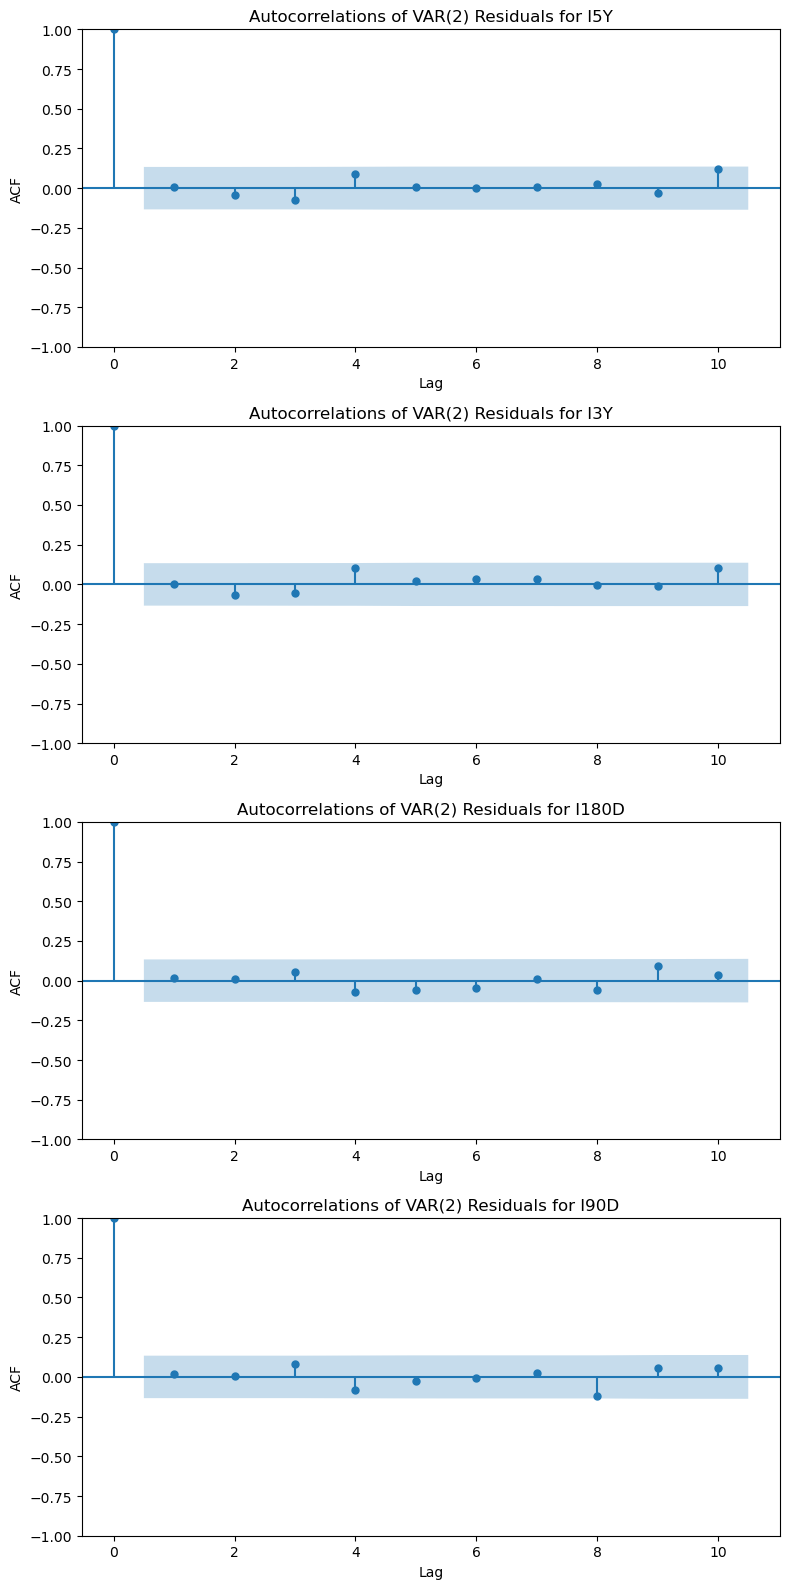

In [30]:
model_2 = VAR(df).fit(2)

residuals_var2 = model_2.resid

# 
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

# i(5y)
plot_acf(residuals_var4['I5Y'], ax=axes[0], lags=10, title='Autocorrelations of VAR(2) Residuals for I5Y')
axes[0].set_ylabel('ACF')
axes[0].set_xlabel('Lag')
#
# i(3y)
plot_acf(residuals_var4['I3Y'], ax=axes[1], lags=10, title='Autocorrelations of VAR(2) Residuals for I3Y')
axes[1].set_ylabel('ACF')
axes[1].set_xlabel('Lag')

# i(180d)
plot_acf(residuals_var4['I180D'], ax=axes[2], lags=10, title='Autocorrelations of VAR(2) Residuals for I180D')
axes[2].set_ylabel('ACF')
axes[2].set_xlabel('Lag')

# i(90d)
plot_acf(residuals_var4['I90D'], ax=axes[3], lags=10, title='Autocorrelations of VAR(2) Residuals for I90D')
axes[3].set_ylabel('ACF')
axes[3].set_xlabel('Lag')

# 显示图形
plt.tight_layout()
plt.show()


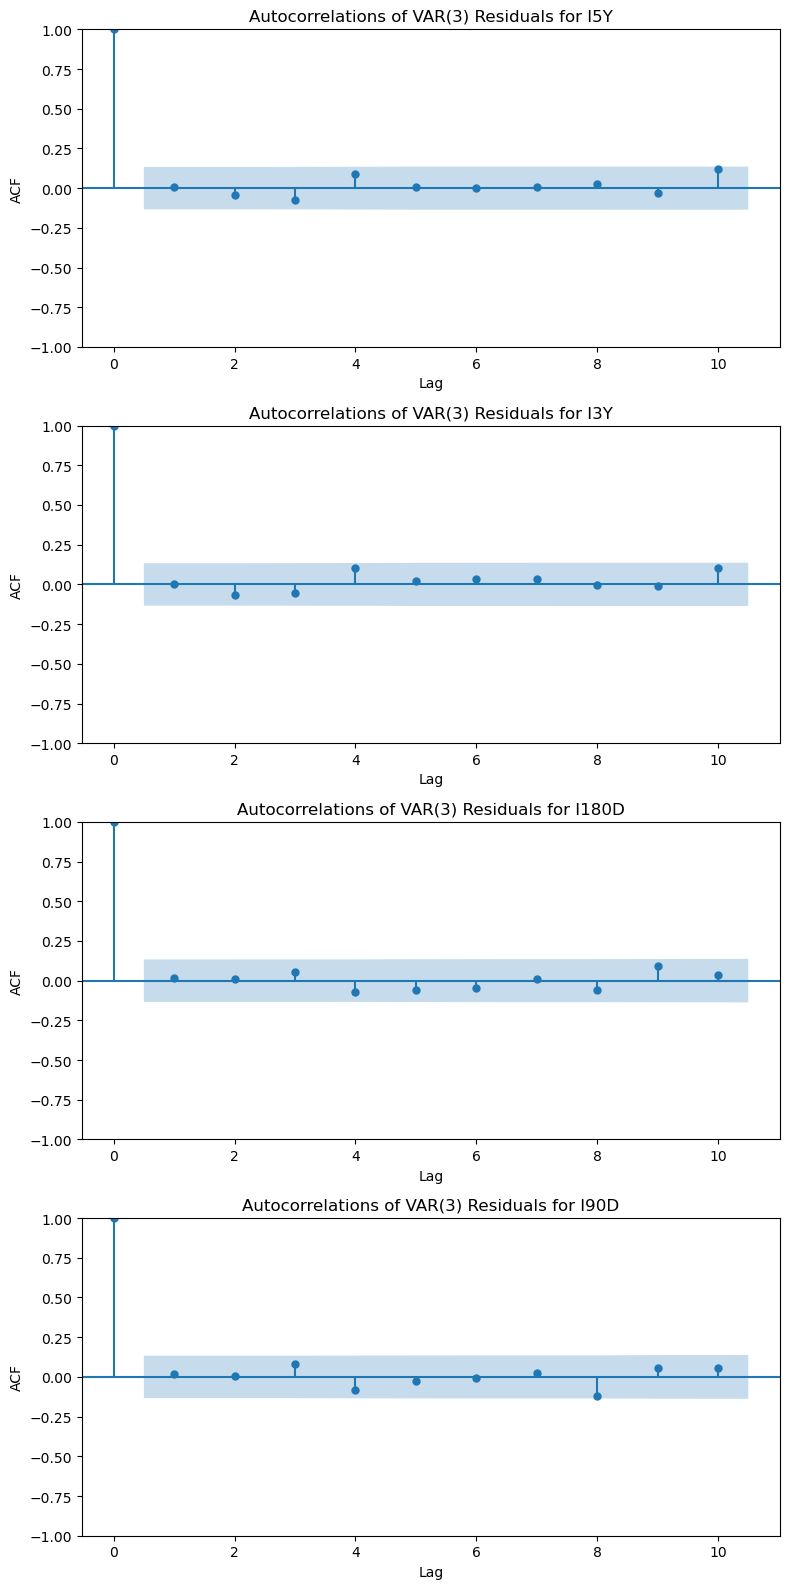

In [29]:
model_3 = VAR(df).fit(3)

residuals_var3 = model_3.resid

# 
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

# i(5y)
plot_acf(residuals_var4['I5Y'], ax=axes[0], lags=10, title='Autocorrelations of VAR(3) Residuals for I5Y')
axes[0].set_ylabel('ACF')
axes[0].set_xlabel('Lag')
#
# i(3y)
plot_acf(residuals_var4['I3Y'], ax=axes[1], lags=10, title='Autocorrelations of VAR(3) Residuals for I3Y')
axes[1].set_ylabel('ACF')
axes[1].set_xlabel('Lag')

# i(180d)
plot_acf(residuals_var4['I180D'], ax=axes[2], lags=10, title='Autocorrelations of VAR(3) Residuals for I180D')
axes[2].set_ylabel('ACF')
axes[2].set_xlabel('Lag')

# i(90d)
plot_acf(residuals_var4['I90D'], ax=axes[3], lags=10, title='Autocorrelations of VAR(3) Residuals for I90D')
axes[3].set_ylabel('ACF')
axes[3].set_xlabel('Lag')

# 显示图形
plt.tight_layout()
plt.show()


### Question b)

In [4]:
def compute_aic_bic(model_result):
    log_likelihood = model_result.llf
    n_obs = model_result.nobs
    n_params = model_result.params.shape[0] * model_result.params.shape[1]
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + n_params * np.log(n_obs)
    return aic, bic

In [19]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM

def compute_aic_bic(model_result):
    log_likelihood = model_result.llf
    n_obs = model_result.nobs
    
    n_params_beta = np.prod(model_result.beta.shape)
    n_params_gamma = np.prod(model_result.gamma.shape)
    n_params = n_params_beta + n_params_gamma
    
    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + n_params * np.log(n_obs)
    return aic, bic

coint_ranks = range(1, df.shape[1] + 1)
k_ar_diffs = range(1, 4)  

results = []

for rank in coint_ranks:
    for k_ar in k_ar_diffs:
        model = VECM(df, k_ar_diff=k_ar, coint_rank=rank, deterministic='co', seasons=0, first_season=0)
        model_result = model.fit()
        aic, bic = compute_aic_bic(model_result)
        results.append({'coint_rank': rank, 'k_ar_diff': k_ar, 'AIC': aic, 'BIC': bic})

results_df = pd.DataFrame(results)

print(results_df)

# BIC Criteria !!?
results_df = results_df.sort_values(by=['k_ar_diff', 'BIC'])

min_bic_rows = results_df.groupby('k_ar_diff').first().reset_index()

print(min_bic_rows[['k_ar_diff', 'coint_rank', 'BIC']])

# AIC Criteria !!?
results_df = results_df.sort_values(by=['k_ar_diff', 'AIC'])

min_bic_rows = results_df.groupby('k_ar_diff').first().reset_index()

print(min_bic_rows[['k_ar_diff', 'coint_rank', 'AIC']])

    coint_rank  k_ar_diff          AIC          BIC
0            1          1 -1425.680853 -1358.175284
1            1          2 -1472.696574 -1351.353605
2            1          3 -1465.661883 -1290.631130
3            2          1 -1457.879813 -1376.873132
4            2          2 -1495.231733 -1360.406212
5            2          3 -1486.517599 -1298.022942
6            3          1 -1463.222034 -1368.714239
7            3          2 -1497.618249 -1349.310175
8            3          3 -1487.611700 -1285.653139
9            4          1 -1458.997823 -1350.988914
10           4          2 -1495.471800 -1333.681175
11           4          3 -1483.832091 -1268.409626
   k_ar_diff  coint_rank          BIC
0          1           2 -1376.873132
1          2           2 -1360.406212
2          3           2 -1298.022942
   k_ar_diff  coint_rank          AIC
0          1           3 -1463.222034
1          2           3 -1497.618249
2          3           3 -1487.611700


#### (c) Compute the Johansen’s trace and maximum eigenvalue statistics

In [43]:
lag_order = 2
joh_result = coint_johansen(df, det_order= -1, k_ar_diff=lag_order)
trace_stat, trace_crit_vals = joh_result.lr1, joh_result.cvt
max_eig_stat, max_eig_crit_vals = joh_result.lr2, joh_result.cvm
print(f"Trace statistics: {trace_stat}")
print(f"Critical values for trace test: {trace_crit_vals}")
print(f"Max eigenvalue statistics: {max_eig_stat}")
print(f"Critical values for max eigenvalue test: {max_eig_crit_vals}")

Trace statistics: [86.09719267 30.33404714 10.23547018  1.89803824]
Critical values for trace test: [[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]]
Max eigenvalue statistics: [55.76314553 20.09857696  8.33743194  1.89803824]
Critical values for max eigenvalue test: [[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
